In [21]:
import requests
import numpy as np
import matplotlib.pylab as plt
import json, os
from glob import glob
import pandas as pd

# data AROME from opendatasoft

données de prévision météo du modèle AROME de météo france, distribuées par OpenDataFrance

https://public.opendatasoft.com/explore/dataset/arome-0025-enriched/information/?disjunctive.commune&disjunctive.code_commune

https://public.opendatasoft.com/explore/dataset/arome-0025-sp1_sp2/information/

Résolution : 0,025° (env. 2,5 km) (existe aussi à 0,01° (env 1,3km))

* dataset:


     arome-0025-enriched 
     arome-0025-sp1_sp2
     arpege-05-sp1_sp2 
     
    Pour toutes les grilles
    • De 0h à 48h par pas de 1h sur les réseaux de 0h et 12h
    • De 0h à 45h par pas de 1h sur le réseau de 3h
    • De 0h à 42h par pas de 1h sur les réseaux de 6h et 18h
    • De 0h à 7h par pas de 1h sur les réseaux 9h, 15h et 21h

In [59]:
def read_json(path):
    with open(path, 'r') as f:
        data = json.load(f)

    records = [d['fields'] for d in data['records']]

    df = pd.DataFrame.from_records(records, index='forecast')
    df.index = pd.to_datetime(df.index)
    return df

In [60]:
filepaths = glob('data/arome/*.json')

In [62]:
data = [read_json(path) for path in filepaths]

In [63]:
data[0].columns

Index(['surface_net_thermal_radiation', 'downward_short_wave_radiation_flux',
       '2_metre_temperature', 'dist', 'minimum_temperature_at_2_metres',
       'surface_net_solar_radiation', 'timestamp', 'surface_latent_heat_flux',
       'total_water_precipitation', 'relative_humidity',
       'surface_sensible_heat_flux', 'position', 'wind_speed',
       'maximum_temperature_at_2_metres'],
      dtype='object')

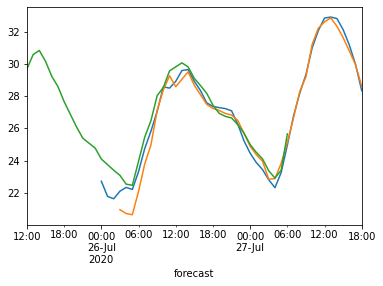

In [65]:
for df in data:
    df['2_metre_temperature'].plot();